# Data quality control

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'parkinsons_updrs.csv'
df = pd.read_csv(file_path)
df.head()
##in here im displaying the top 5 rows from my dataset loaded using pandas library.

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
df.shape
#this is just so i see the full size of the data set, in this case its 22 columns and 5875 rows.

(5875, 22)

#### Identify missing values:

In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


#### swapping of missing values:

In [5]:
df.fillna("missing", inplace=True)
#In this case, this is not needed, since we dont have missing data, but i'll put it anyways.

#### Recognition of uniform or illogical distributions:

          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.00000

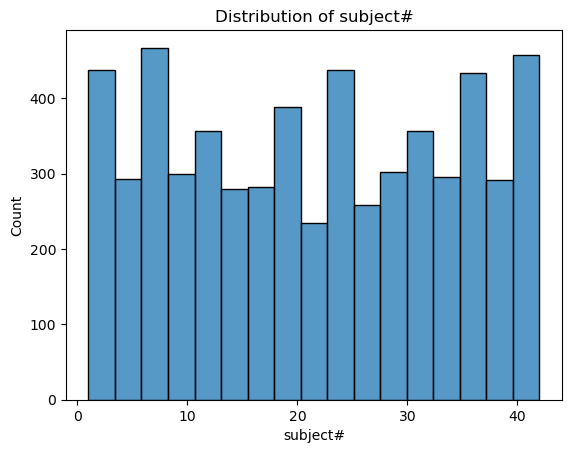

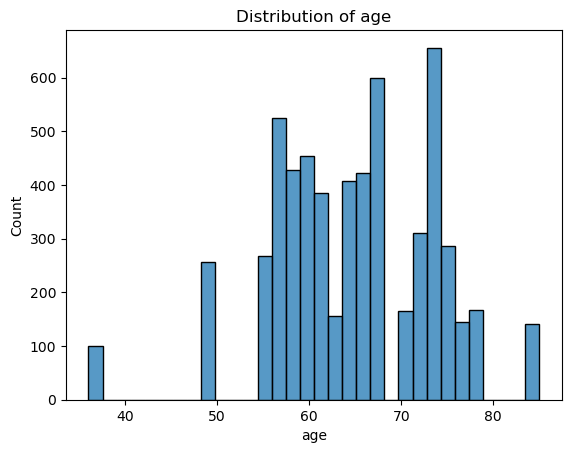

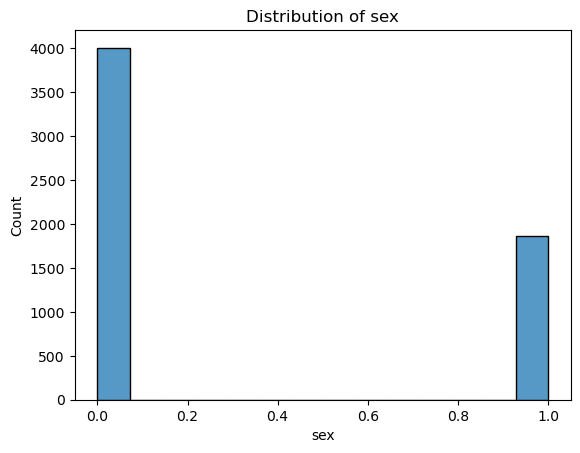

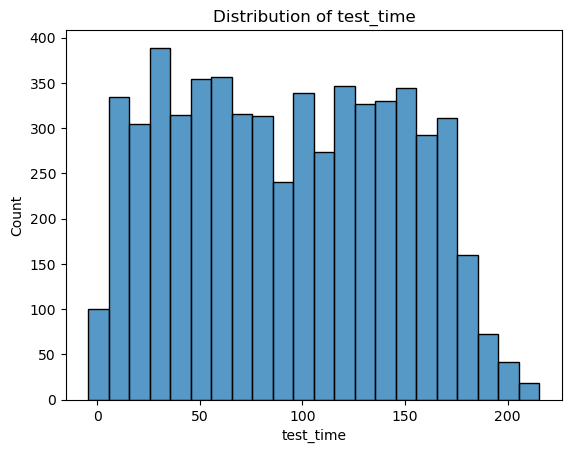

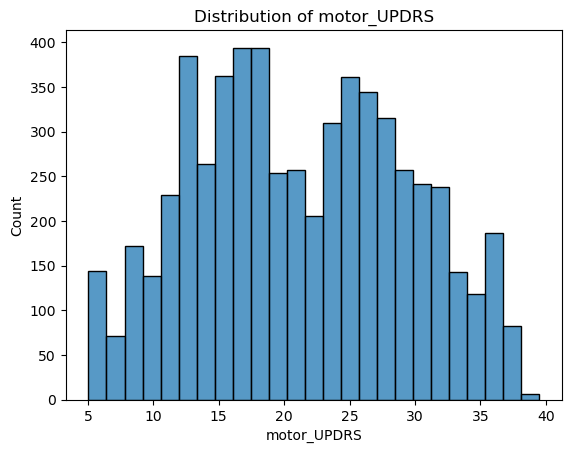

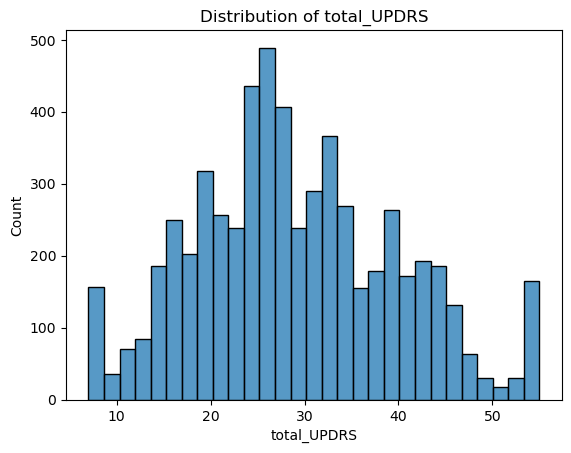

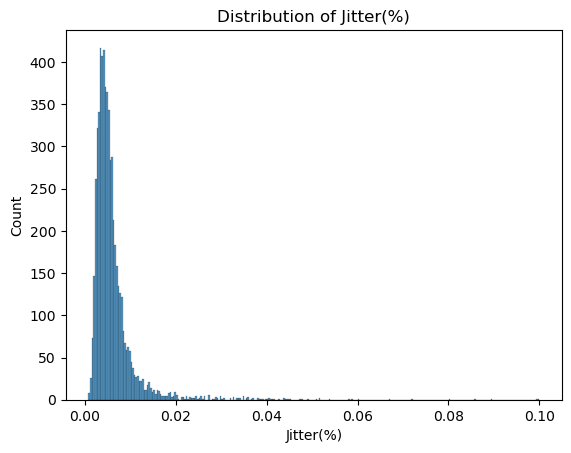

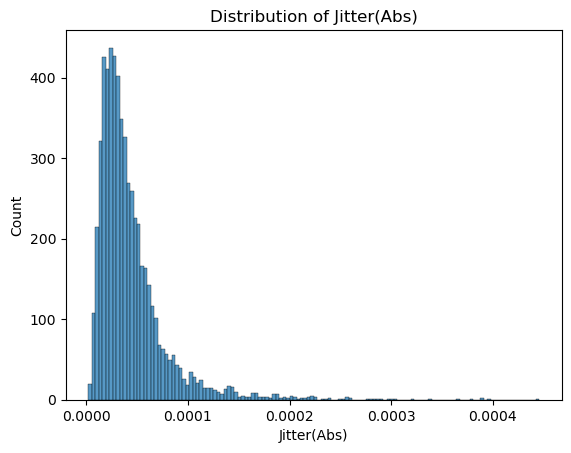

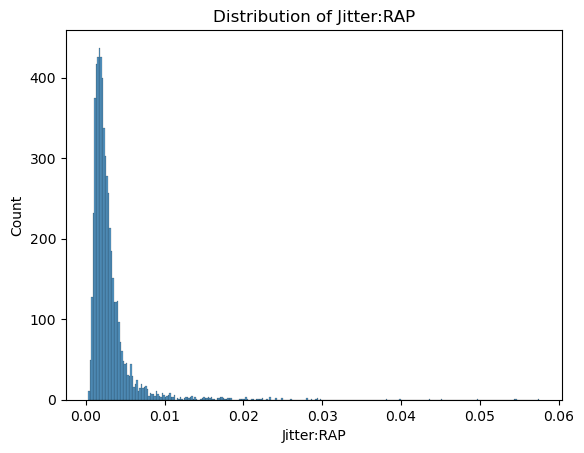

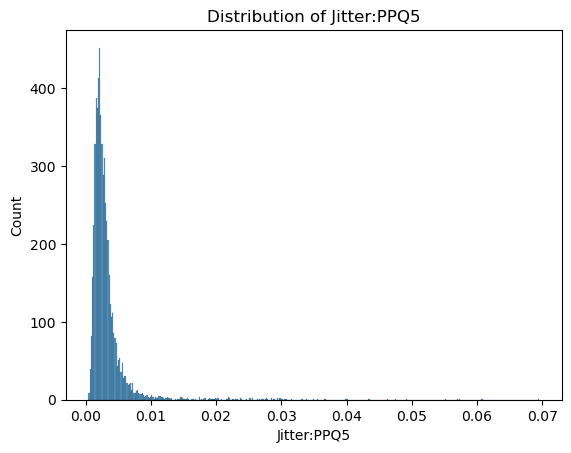

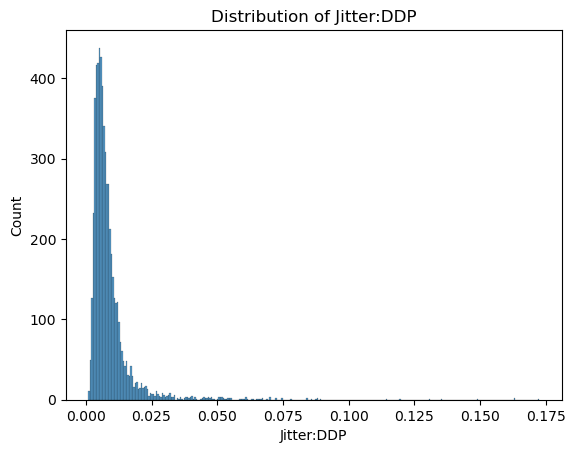

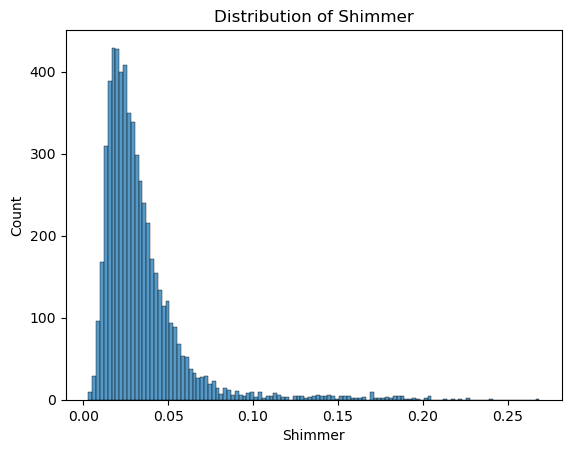

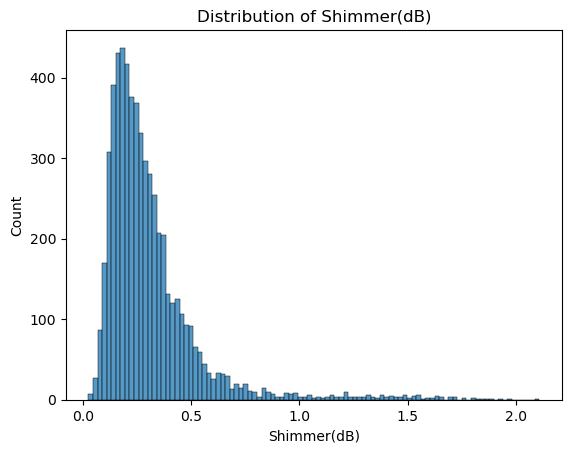

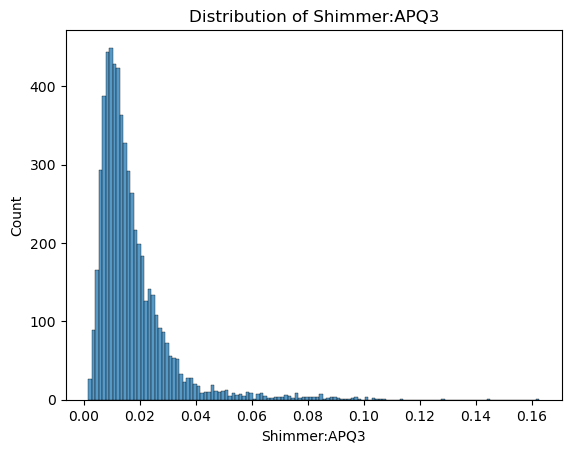

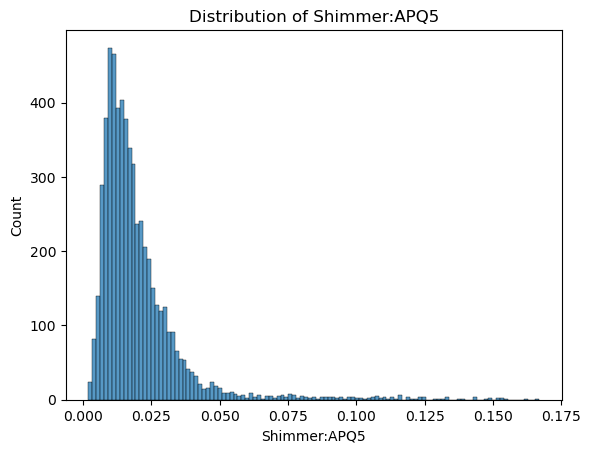

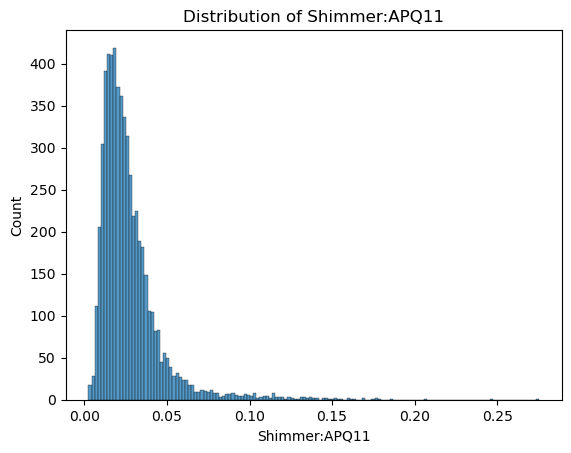

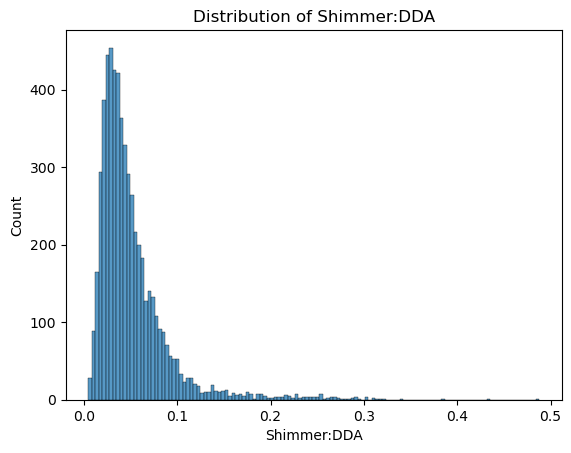

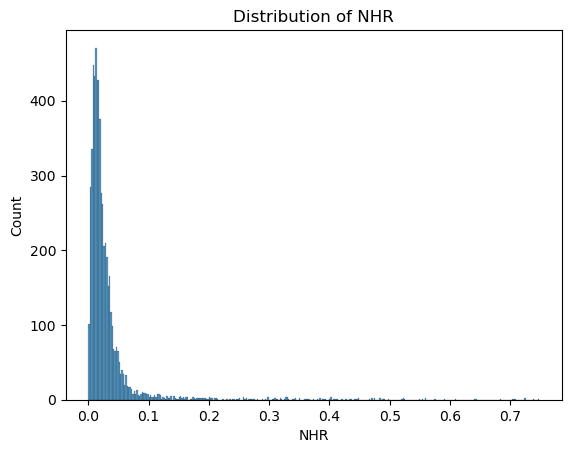

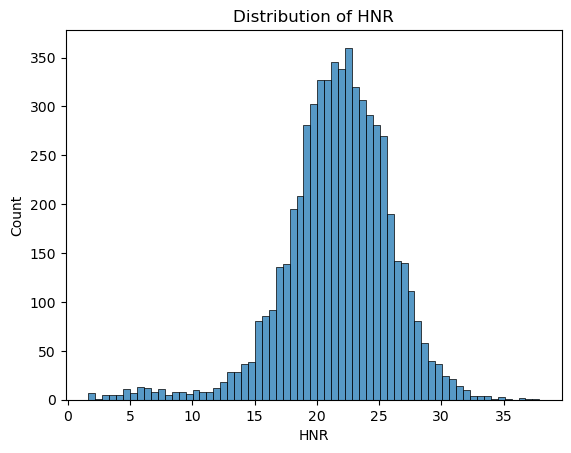

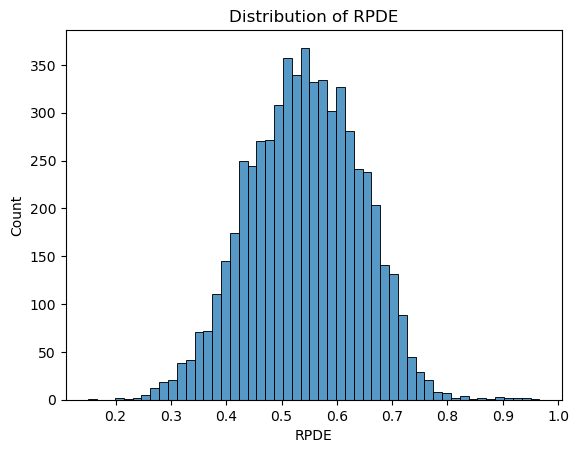

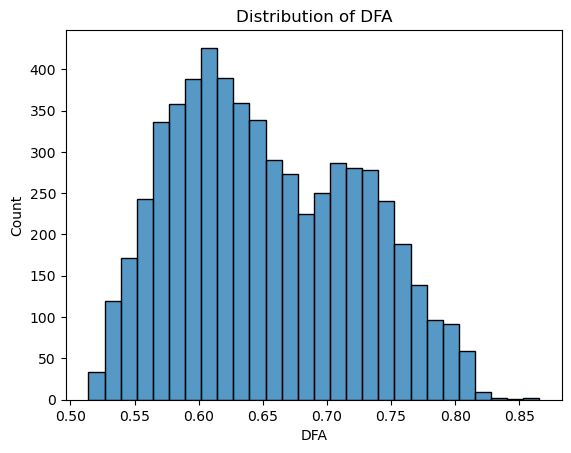

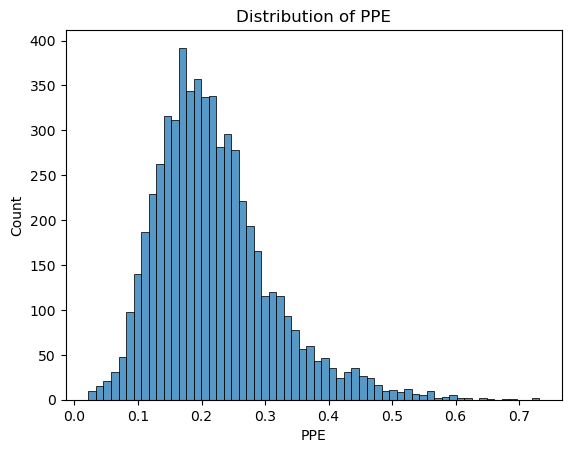

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

descriptive_stats = df.describe(include='all')
#according to https://www.w3schools.com/python/pandas/ref_df_describe.asp
#Describe function contains these details:
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.
print(descriptive_stats)




#After we plot the histogram
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

We can see from previous result multiple notes:

1-Count is equal to 5875 in all of them, which means there is no missing data.

2-Standard deviation values are mostly low on all the attributes, which indicates there is no extreme cases in the data, and all the values are close to eachothers.

3-The mean for age is 64 which shows that mostly older people are experiencing this.

4-From the sex Histogram, we can see that the males have double the number of females, which shows that male have double the chances of females of experiencing this.

In [13]:
continuousVars = ['subject#', 'age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
total_count = 5875

for var in continuousVars:
    mean_value = df[var].mean()
    std_dev = df[var].std()

    below_lower_bound = df[df[var] < (mean_value - 3 * std_dev)]
    above_upper_bound = df[df[var] > (mean_value + 3 * std_dev)]

    if len(below_lower_bound) > 0:
        count_below = below_lower_bound.shape[0]
        percent_below = round((count_below / total_count) * 100, 2)
        print(f"For the variable '{var}', the lower limit details are:")
        print(f"  Lower limit value: {(mean_value - 3 * std_dev)}")
        print(f"  Actual minimum value in data: {df[var].min()}")
        print(f"  Number of entries below the lower limit: {count_below}")
        print(f"  Percentage of entries below the lower limit: {percent_below}%\n")

    if len(above_upper_bound) > 0:
        count_above = above_upper_bound.shape[0]
        percent_above = round((count_above / total_count) * 100, 2)
        print(f"For the variable '{var}', the upper limit details are:")
        print(f"  Upper limit value: {(mean_value + 3 * std_dev)}")
        print(f"  Actual maximum value in data: {df[var].max()}")
        print(f"  Number of entries above the upper limit: {count_above}")
        print(f"  Percentage of entries above the upper limit: {percent_above}%\n")


For the variable 'age', the lower limit details are:
  Lower limit value: 38.34036495899028
  Actual minimum value in data: 36
  Number of entries below the lower limit: 101
  Percentage of entries below the lower limit: 1.72%

For the variable 'Jitter(%)', the upper limit details are:
  Upper limit value: 0.02302644652873401
  Actual maximum value in data: 0.09999
  Number of entries above the upper limit: 107
  Percentage of entries above the upper limit: 1.82%

For the variable 'Jitter(Abs)', the upper limit details are:
  Upper limit value: 0.00015197984855772027
  Actual maximum value in data: 0.00044559
  Number of entries above the upper limit: 115
  Percentage of entries above the upper limit: 1.96%

For the variable 'Jitter:RAP', the upper limit details are:
  Upper limit value: 0.012358641619891973
  Actual maximum value in data: 0.05754
  Number of entries above the upper limit: 106
  Percentage of entries above the upper limit: 1.8%

For the variable 'Jitter:PPQ5', the uppe

Using the 3 sigma method, we can conclude that most of the data lies outside the expected limits of the normal distribution (age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,PPE).

Some of the data were inside the expected limits of normal distribution, for example (subject#,test_time,motor_UPDRS,total_UPDRS)


Frequency distribution of categorical variables
For categorical variables, we will use frequency analysis to determine if there is a uniform and illogical distribution of values.

In [25]:
categoricalVars = {
 'sex': {0: 'male', 1: 'female'}
}

all_freq_data = pd.DataFrame()
for var, mapping in categoricalVars.items():
 # Mapping values to descriptive labels
 mapped_var = df[var].map(lambda value: f"{value} - {mapping.get(value, 'missing value')}")
 counts = mapped_var.value_counts()
 norm_counts = mapped_var.value_counts(normalize=True)
 combined = pd.concat([counts, norm_counts], axis=1, keys=['Occurrence', 'Normalization'])
 combined['Variable Name'] = var

 # Add to dataset for all frequency data
 all_freq_data = pd.concat([all_freq_data, combined])

 print(f"Frequency for variable {var}:")
 print (combined)
 print("\n")

# Reset index to convert variable labels to column
all_freq_data.reset_index(inplace=True)
all_freq_data.rename(columns={'index': 'Variable value'}, inplace=True)

Frequency for variable sex:
            Occurrence  Normalization Variable Name
0 - male          4008       0.682213           sex
1 - female        1867       0.317787           sex




The dataset includes both males and females, showcasing diversity in the variable "sex"

Males are represented more than twice as frequently as females, With 4008 occurrences for males (68.22%) and 1867 occurrences for females (31.78%).
This results gives us more evidence that males have higher chances of having parkinsons disease than females.

#### Check / redesign / determine the target variable and its quality:

The target variable i considered is "motor_UPDRS", after some research i found that the Unified Parkinson's Disease Rating Scale (UPDRS) is a widely used clinical rating scale to assess the severity of Parkinson's disease, so it will be a good candidate.

In [26]:
import numpy as np
# Calculate the average value of motor_UPDRS
avg_motor_UPDRS = df['motor_UPDRS'].mean()

# Create a new column to categorize values as "Below Average" or "Above Average"
df['motor_UPDRS'] = np.where(df['motor_UPDRS'] < avg_motor_UPDRS, 'Below Average', 'Above Average')

# Create frequency table for motor_UPDRS_category
motor_UPDRS_frequency = df['motor_UPDRS'].value_counts().to_frame(name='Occurrence')
motor_UPDRS_frequency['%'] = df['motor_UPDRS'].value_counts(normalize=True)
motor_UPDRS_frequency['Name of the variable'] = 'Motor_UPDRS'

# Renaming the index for a nicer printout
motor_UPDRS_frequency.index = ['Below Average', 'Above Average']

motor_UPDRS_frequency

,Occurrence,%,Name of the variable
Below Average,3005,0.511489,Motor_UPDRS
Above Average,2870,0.488511,Motor_UPDRS


The frequency result table for variable motor_UPDRS shows very close cases between below and above average frequencies, which is very typical for this disease.

Quality of the variable target
The quality of the target variable is essential for any statistical analysis, and can be assessed in the following steps:

1-Data consistency check:
We have already seen that the data is consistent and that there are no input errors, such as impossible values or incorrect data entry (typo).

2-Checking for missing values:
The initial dataset had no missing values.

3-Balance:
There are 51.1% below average and 48.8% above average, indicating a balanced distribution.

# Statistical analyses of a sample of data

#### For each categorical variable, show the frequency distribution in a graph

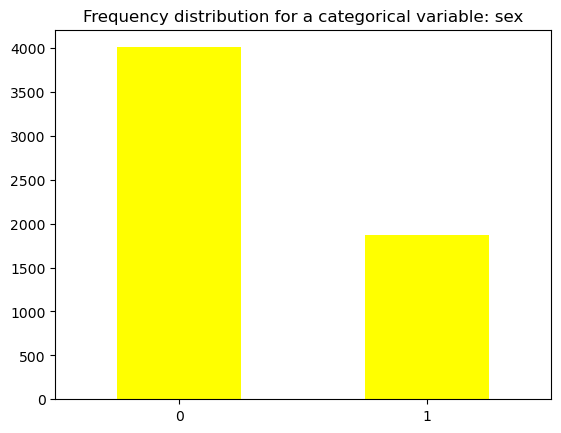

In [27]:
for var in categoricalVars:
    plt.figure()
    df[var].value_counts().plot(kind='bar', color='yellow')
    plt.title(f"Frequency distribution for a categorical variable: {var}")
    plt.xticks(rotation=0)  
    plt.show()

#### For each continuous variable, calculate the mean value, z values, roundness of the distribution, slope of the distribution

Skewness and Kurtosis are statistical measures that describe the shape of the data distribution.

#### Z-value
The Z-value, or standardized score, is a statistical measure that describes the position of an individual value within a distribution in relation to the mean and standard deviation of that distribution. The Z-value is calculated using the formula:
Z = (X - μ) / σ

where:<br>
X - single value <br>
μ - mean value of the data set <br>
σ - standard deviation <br>

The Z-value shows how many standard deviations an individual value deviates from the mean:<br>

Z-value = 0 means the value is equal to the mean.<br>
A positive Z-value means that the value is above the mean.<br>
A negative Z-value means that the value is below the mean.<br>

In [16]:
# Calculation of basic statistics, skewness and roundness for filtered continuous variables
basic_stats_loaded = df[continuousVars].describe()
skewness_loaded = df[continuousVars].skew()
kurtosis_loaded = df[continuousVars].kurtosis()

# Adding skewness and roundness as new rows
additional_stats_loaded = pd.DataFrame({'Skewness': skewness_loaded, 'Kurtosis': kurtosis_loaded}).transpose()
combined_stats_loaded = pd.concat([basic_stats_loaded, additional_stats_loaded])

# Filtering to keep only the middle rows. value, skewness and kurtosis
filtered_stats_loaded = combined_stats_loaded.loc[['mean', 'Skewness', 'Kurtosis']]

# Display the first table
print("Display mean value, roundness of distribution and skewness of distribution")
display(filtered_stats_loaded)

# Calculating the z-value for each continuous variable
means = df[continuousVars].mean()
std_devs = df[continuousVars].std()
z_scores = (df[continuousVars] - means) / std_devs


# Display z-values for the first n rows for continuous variables
print("Display of z-value by patients")
display(z_scores.head())

Display mean value, roundness of distribution and skewness of distribution


,subject#,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
mean,21.494128,64.804936,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
Skewness,0.002996,-0.379133,0.077720,0.075248,0.271053,6.451846,3.283006,6.945438,7.586205,6.945376,...,3.099221,3.097223,3.698061,3.406958,3.097224,6.549123,-0.812057,-0.037434,0.282078,1.090819
Kurtosis,-1.249474,0.670455,-1.147377,-0.937523,-0.355704,67.496559,18.155509,78.534581,81.566374,78.532426,...,13.091042,14.724563,19.244339,19.160187,14.724600,52.606172,2.505159,-0.065036,-0.880246,1.951793


Display of z-value by patients


,subject#,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,-1.656455,0.815626,-1.631951,0.849124,0.502702,0.082898,-0.284355,0.327425,-0.028635,0.328477,...,-0.351612,-0.209691,-0.423320,-0.543420,-0.209686,-0.298695,-0.009204,-1.213962,-1.478374,-0.650603
1,-1.656455,0.815626,-1.500549,0.879631,0.549056,-0.560746,-0.756805,-0.533701,-0.476171,-0.534779,...,-0.573107,-0.545111,-0.565544,-0.529910,-0.545107,-0.351935,1.282541,-1.055029,-1.247774,-1.218481
2,-1.656455,0.815626,-1.369294,0.910138,0.595317,-0.238924,-0.540034,-0.300012,-0.320739,-0.298957,...,-0.564421,-0.741529,-0.702366,-0.645490,-0.741524,-0.199353,0.318684,-0.784793,-1.540008,-0.103271
3,-1.656455,0.815626,-1.257666,0.935971,0.634661,-0.155357,-0.484451,-0.344829,-0.170667,-0.344841,...,0.069662,-0.460501,-0.449725,-0.392815,-0.460748,-0.071748,0.644475,-0.536441,-1.062024,1.236969
4,-1.656455,0.815626,-1.108075,0.970660,0.687464,-0.498515,-0.665094,-0.658548,-0.529769,-0.659626,...,-0.586136,-0.783079,-0.651358,-0.464865,-0.783325,-0.343341,1.036217,-0.689136,-1.297843,-0.283930


Comment on the results:

High skewness values in some variables such as Jitter(%), Jitter(Abs), Jitter:RAP,	Jitter:PPQ5,Jitter:DDP, Shimmer(dB),Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA, and NHR indicate an asymmetric distribution, where a larger number of values are concentrated at one end of the spectrum.

The extremely high kurtosis (pointed distribution) for the Jitter(%), Jitter(Abs), Jitter:RAP,	Jitter:PPQ5,Jitter:DDP and NHR  shows that the values are concentrated around a single value. This may indicate large variations in the jitter value of patients with parkinson disease.

Monitoring the z-value helps identify individual characteristics of patients that may require special attention or treatment adjustment.

We have shown the z-value for 5 patients.

It is noticeable that the patient has a lower value of motor UPDRS, which shows that the patient has a weaker version of the disease.

# Visual representation of z-values


Each continuous variable from the dataset will be visually displayed for the first patient. In addition, we will also show the calculated z-values and additionally calculate two percentages for each variable:

The percentage of patients who have a lower value of the variable than the observed value in the first patient.
The percentage of patients who have a higher value of the variable than the observed value in the first patient.

This will give us a deeper insight into how the values of the first patient compare to the other patients in the dataset.

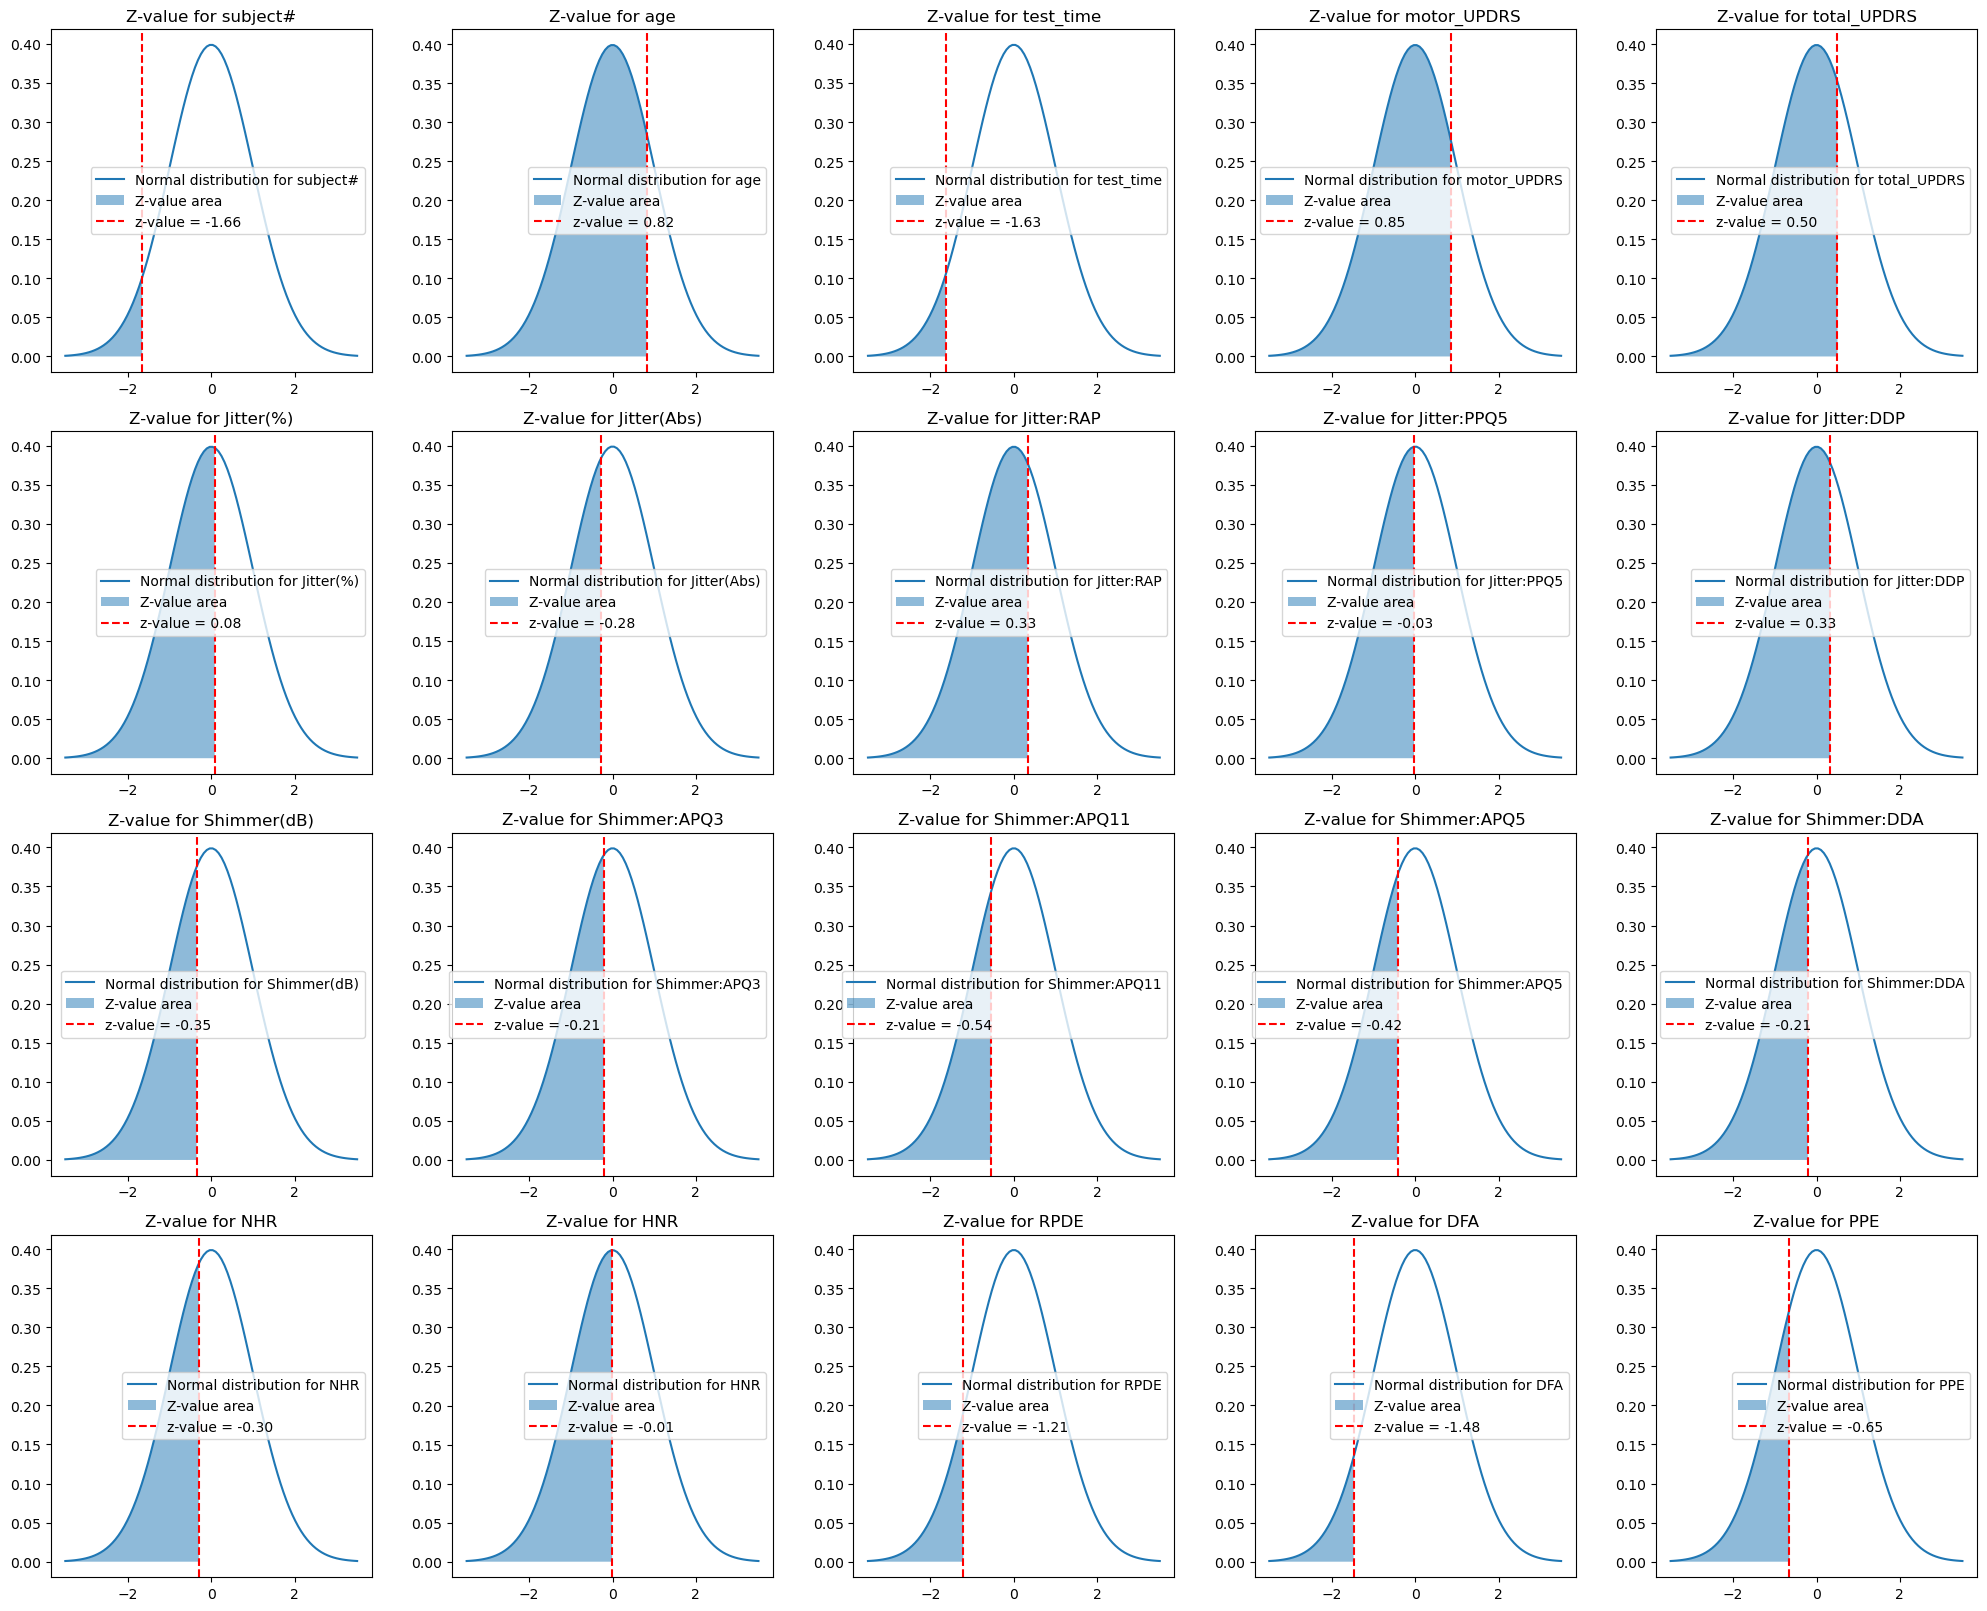

In [28]:
import scipy.stats as stats

# Z-values for the first patient for each variable
z_values_first_patient = {
 'subject#': -1.656455,
 'age': 0.815626,
 'test_time': -1.631951,
 'motor_UPDRS': 0.849124,
 'total_UPDRS': 0.502702,
 'Jitter(%)': 0.082898,
 'Jitter(Abs)': -0.284355,
 'Jitter:RAP': 0.327425,
 'Jitter:PPQ5': -0.028635,
 'Jitter:DDP': 0.328477,
 'Shimmer(dB)': -0.351612,
 'Shimmer:APQ3': -0.209691,
 'Shimmer:APQ11': -0.543420,
 'Shimmer:APQ5': -0.423320,
 'Shimmer:DDA': -0.209686,
 'NHR': -0.298695,
 'HNR': -0.009204,
 'RPDE': -1.213962,
 'DFA': -1.478374,
 'PPE': -0.650603,
}

# displaying 5 graphs per line
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

# Show the normal distribution curve for each z-value
for i, (variable, z_value) in enumerate(z_values_first_patient.items()):
    # Define the range for the x-axis
    x = np.linspace(-3.5, 3.5, 100)
    # Calculate the normal distribution curve
    y = stats.norm.pdf(x)

    # plotting the graph
    axes[i].plot(x, y, label=f'Normal distribution for {variable}')

    # coloring the area
    shade = np.linspace(-3.5, z_value, 300)
    axes[i].fill_between(shade, stats.norm.pdf(shade), alpha=0.5, label=f'Z-value area')

    # adding line to mark the z-index for better visibility
    axes[i].axvline(z_value, color='red', linestyle='--', label=f'z-value = {z_value:.2f}')
    axes[i].set_title(f'Z-value for {variable}')
    axes[i].legend()

# Hide any unused subplots
for i in range(len(z_values_first_patient), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import norm
# Values for the first patient
real_values_first_patient = df.iloc[0][continuousVars]

# Z-values for the first patient
z_values_first_patient = z_scores.iloc[0]

# Calculation and printing of percentages with additional information
for var in continuousVars:
 real_value = real_values_first_patient[var] # The value of the variable
 z_value = z_values_first_patient[var] # Z-value of the variable

 pct_below = norm.cdf(z_value) * 100 # Percentage of patients with a lower value
 pct_above = (1 - norm.cdf(z_value)) * 100 # Percentage of patients with a higher value

 print(f"{var}:")
 print(f" Value of {var}: {real_value:.2f}")
 print(f" Z-value: {z_value:.2f}")
 print(f" Percentage of patients with a lower value: {pct_below:.2f}%")
 print(f" Percentage of patients with higher value: {pct_above:.2f}%\n")

subject#:
 Value of subject#: 1.00
 Z-value: -1.66
 Percentage of patients with a lower value: 4.88%
 Percentage of patients with higher value: 95.12%

age:
 Value of age: 72.00
 Z-value: 0.82
 Percentage of patients with a lower value: 79.26%
 Percentage of patients with higher value: 20.74%

test_time:
 Value of test_time: 5.64
 Z-value: -1.63
 Percentage of patients with a lower value: 5.13%
 Percentage of patients with higher value: 94.87%

motor_UPDRS:
 Value of motor_UPDRS: 28.20
 Z-value: 0.85
 Percentage of patients with a lower value: 80.21%
 Percentage of patients with higher value: 19.79%

total_UPDRS:
 Value of total_UPDRS: 34.40
 Z-value: 0.50
 Percentage of patients with a lower value: 69.24%
 Percentage of patients with higher value: 30.76%

Jitter(%):
 Value of Jitter(%): 0.01
 Z-value: 0.08
 Percentage of patients with a lower value: 53.30%
 Percentage of patients with higher value: 46.70%

Jitter(Abs):
 Value of Jitter(Abs): 0.00
 Z-value: -0.28
 Percentage of patient

#### Comment on the results

Graphs show the normal distribution for each continuous variable with specific z-values ​​for the first observed patient.

Each graph contains:<br>
The blue solid curve showing the theoretical normal distribution for the variable.
The vertical red dashed line indicates the z-value of the first observed patient.
The shaded part below the curve to the red line showing the percentage of patients with a value lower than the first observed patient for that variable.<br>

### Calculate the correlations of each variable with the target variable

#### Calculation of CATEGORICAL variables with target variable

Although we didn't cover the Chi-square test in our studies, I wanted to examine the relationship between the categorical variables and the target variable "motor_UPDRS".

The Chi-square statistic measures the difference between observed and expected values, while the p-value determines the statistical significance of this difference. If the p-value is below the chosen threshold (typically 0.05), the results are deemed statistically significant.

In [9]:
chi2_results_corrected = []
#for some reason i had issues with references, even though i executed the code for them above, so i re-wrote them here just incase
import pandas as pd
from scipy.stats import skew, kurtosis, chi2_contingency
categoricalVars = {
 'sex': {0: 'male', 1: 'female'}
}

for var in categoricalVars:
    contingency_table = pd.crosstab(df[var], df['motor_UPDRS'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # We add the results to the sheet as a dictionary for each variable
    chi2_results_corrected.append({'Variable': var, 'Chi2 Statistic': chi2, 'p-value': p_value})

# We create a DataFrame from the list of results
results_df = pd.DataFrame(chi2_results_corrected)

# We set the display format for numeric values
styled_results = results_df.style.format({'Chi2 Statistic': "{:.4f}", 'p-value': "{:.4f}"})

# Styles
styled_results = styled_results.background_gradient(subset=['Chi2 Statistic', 'p-value'], cmap='viridis')\
                               .set_properties(**{'text-align': 'left'})\
                               .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
                               .set_caption("Chi-square Test Results")
display(styled_results)


,Variable,Chi2 Statistic,p-value
0,sex,5648.1662,0.0000


#### Calculation of CONTINUOUS variables with a target variable

Correlation quantifies the strength and direction of a linear relationship between two variables. In our analysis, we'll utilize the corr() function from the Pandas library in Python to compute correlation matrices between all numeric columns in the dataset and the target variable "motor_UPDRS".

The output is a matrix where each element represents the correlation coefficient between pairs of columns.

A correlation coefficient greater than 0 indicates a positive correlation, meaning that as one variable increases, the other variable also increases.

A correlation coefficient less than 0 indicates a negative correlation, meaning that as one variable increases, the other decreases.

A correlation coefficient equal to 0 indicates no correlation between the variables.

This measure is useful for determining whether a variable has a positive, negative, or neutral relationship with the target variable.

Correlation between 'motor_UPDRS' and continuous variables:
               motor_UPDRS  motor_UPDRS
motor_UPDRS       1.000000     1.000000
subject#          0.252919     0.252919
age               0.273665     0.273665
test_time         0.067918     0.067918
motor_UPDRS       1.000000     1.000000
total_UPDRS       0.947231     0.947231
Jitter(%)         0.084816     0.084816
Jitter(Abs)       0.050899     0.050899
Jitter:RAP        0.072684     0.072684
Jitter:PPQ5       0.076291     0.076291
Jitter:DDP        0.072698     0.072698
Shimmer           0.102349     0.102349
Shimmer(dB)       0.110076     0.110076
Shimmer:APQ3      0.084261     0.084261
Shimmer:APQ5      0.092105     0.092105
Shimmer:APQ11     0.136560     0.136560
Shimmer:DDA       0.084260     0.084260
NHR               0.074967     0.074967
HNR              -0.157029    -0.157029
RPDE              0.128607     0.128607
DFA              -0.116242    -0.116242
PPE               0.162433     0.162433


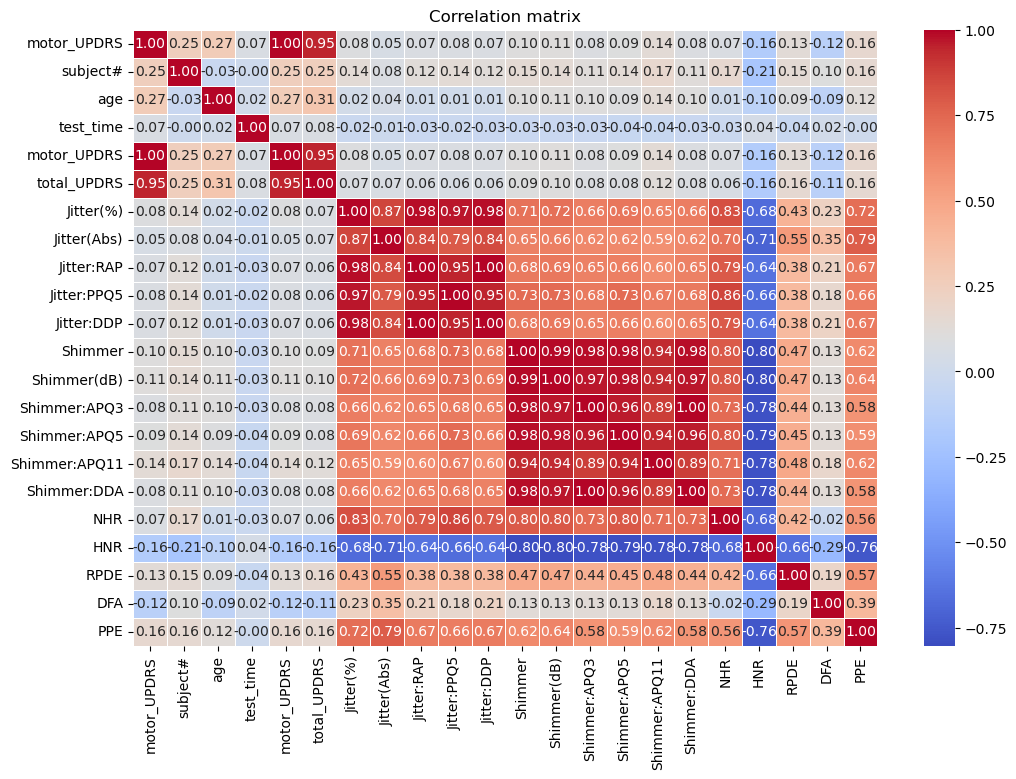

In [17]:
import seaborn as sns
# Calculation of correlation for all continuous variables and target variables 'cid'
pearson_corr = df[['motor_UPDRS'] + continuousVars].corr()

# Show correlation between 'motor_UPDRS' and other continuous variables
print("Correlation between 'motor_UPDRS' and continuous variables:")
print(pearson_corr['motor_UPDRS'])

# Creating a heatmap for visualization
plt.figure(figsize=(12, 8)) # Setting the size
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()

Comments:<br>

Attributes like age have very high correlation with motor_UPDRS(0.27) which can be proved also at the end of this project using IV and WoE values.

#### Calculate the correlations of each variable expressed through the Z value and categorized into classes <-3, (-3 to 3),>3 with the target variable

Correlations of categorized Z-values with the target variable:
subject#_z_category              NaN
age_z_category              0.184705
test_time_z_category             NaN
motor_UPDRS_z_category           NaN
total_UPDRS_z_category           NaN
Jitter(%)_z_category        0.032046
Jitter(Abs)_z_category      0.027526
Jitter:RAP_z_category       0.028472
Jitter:PPQ5_z_category      0.032022
Jitter:DDP_z_category       0.028472
Shimmer_z_category          0.029932
Shimmer(dB)_z_category      0.030193
Shimmer:APQ3_z_category     0.026140
Shimmer:APQ5_z_category     0.029451
Shimmer:APQ11_z_category    0.037132
Shimmer:DDA_z_category      0.026140
NHR_z_category              0.037691
HNR_z_category             -0.039780
RPDE_z_category             0.036928
DFA_z_category                   NaN
PPE_z_category              0.049662
Name: motor_UPDRS, dtype: float64


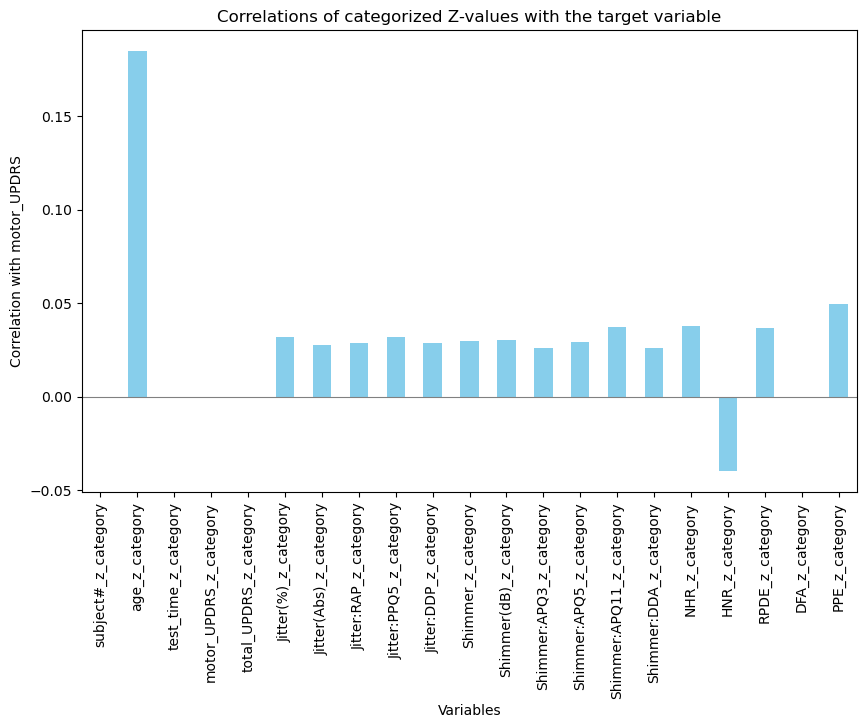

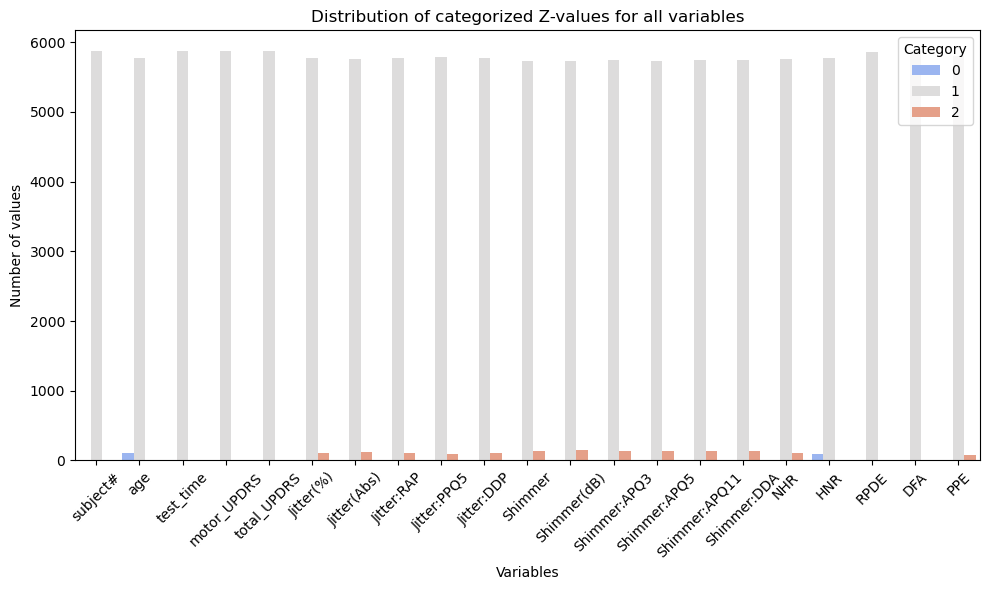

In [25]:
# Calculation of Z-values for continuous variables
for var in continuousVars:
 df[var + '_z'] = (df[var] - df[var].mean()) / df[var].std()

# Categorization of Z-values into three classes
bins = [-np.inf, -3, 3, np.inf]
labels = [0, 1, 2] # 0: <-3, 1: (-3 to 3), 2: >3
category_columns = []

for var in continuousVars:
 z_var = var + '_z'
 cat_var = z_var + '_category'
 df[cat_var] = pd.cut(df[z_var], bins=bins, labels=labels)
 category_columns.append(cat_var)

# Calculating the correlation of categorized Z-values with the target variable cid
correlations = df[category_columns + ['motor_UPDRS']].corr()['motor_UPDRS'].drop('motor_UPDRS')
print("Correlations of categorized Z-values with the target variable:")
print(correlations)

# Excel
correlations.to_excel('z-categories.xlsx')

# Visualization
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations of categorized Z-values with the target variable')
plt.xlabel('Variables')
plt.ylabel('Correlation with motor_UPDRS')
plt.axhline(0, color='grey', linewidth=0.8) # Line for y=0 for reference
plt.show()

# Visualization of the distribution of categorized Z-values
all_categories = pd.DataFrame()
for var in continuousVars:
 category_count = df[var + '_z_category'].value_counts().sort_index()
 category_count = category_count.reindex(labels, fill_value=0)
 category_count = category_count.reset_index()
 category_count.columns = ['Category', 'Count']
 category_count['Variable'] = var
 all_categories = pd.concat([all_categories, category_count], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Count', hue='Category', data=all_categories, palette='coolwarm')
plt.title('Distribution of categorized Z-values for all variables')
plt.xlabel('Variables')
plt.ylabel('Number of values')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

comments

In [27]:
# Convert categorical variable to numeric
if df['test_time_z_category'].dtype.name == 'category':
 df['test_time_z_category'] = df['test_time_z_category'].cat.codes

# Calculation of average values
mean_x = df['test_time_z_category'].mean()
mean_y = df['motor_UPDRS'].mean()
print(f"Average value test_time_z_category : {mean_x}")
print(f"Average motor_UPDRS value: {mean_y}")

# Calculation of deviations
deviation_x = df['test_time_z_category'] - mean_x
deviation_y = df['motor_UPDRS'] - mean_y

# Calculation of covariance
covariance = np.mean(deviation_x * deviation_y)

# Calculation of standard deviations
std_x = df['test_time_z_category'].std()
std_y = df['motor_UPDRS'].std()

# Calculation of the Pearson correlation coefficient
if std_x > 0 and std_y > 0:
 correlation = covariance / (std_x * std_y)
else:
 correlation = np.nan # This will be the case in our example

print("Covariance:", covariance)
print("Standard deviation of X:", std_x)
print("Standard deviation of Y:", std_y)
print("Correlation:", correlation)

Average value test_time_z_category : 1.0
Average motor_UPDRS value: 21.29622854468085
Covariance: 0.0
Standard deviation of X: 0.0
Standard deviation of Y: 8.129281524055392
Correlation: nan


# IV, WoE calculations

#### Calculate IV, WoE for each variable

WoE and IV provide a detailed insight into the relationship between independent variables and the target variable. Based on these results, we should consider focusing on those variables that exhibit high IV values for further modeling, while variables with low IV values may not be useful for inclusion in the final predictive model. Also, WoE analysis can help interpret how different categories within variables affect the likelihood of an outcome, which can inform targeting or intervention decisions.

In general, a positive WoE indicates a category that reduces the probability of failure, while a negative WoE indicates an increased probability of failure. Variables with high IV values should be a priority in prediction models, as they can contribute significantly to the accuracy of the model.

Interpretation of the value IV:

IV < 0.02: Variable is not useful<br>
0.02 ≤ IV < 0.1: Weak predictive power.<br>
0.1 ≤ IV < 0.3: Medium predictive power.<br>
0.3 ≤ IV < 0.5: Strong predictive power.<br>
IV ≥ 0.5: Super Predictive.

In [16]:
import pandas as pd
import numpy as np

median_motor_UPDRS = df['motor_UPDRS'].median()
df['motor_UPDRS_binary'] = np.where(df['motor_UPDRS'] <= median_motor_UPDRS, 'Good', 'Bad')

def calculateWoeAndIv(df, feature, target, smoothing_factor=0.0001):
    tab = pd.crosstab(df[feature], df[target], margins=True, margins_name="Total")

    tab.columns = ['Good', 'Bad', 'Total']

    # Calculation of the distribution
    tab['Distribution Good'] = tab['Good'] / tab.loc['Total', 'Good']
    tab['Distribution Bad'] = tab['Bad'] / tab.loc['Total', 'Bad']

    # I had issue with one of the cases that i devide by 0 and i read online, that its better to add a smoothing factor to fix this case.
    tab['Distribution Good'] = tab['Distribution Good'].replace(0, smoothing_factor)
    tab['Distribution Bad'] = tab['Distribution Bad'].replace(0, smoothing_factor)

    # Calculation of WoE
    tab['WoE'] = np.log(tab['Distribution Good'] / tab['Distribution Bad'])

    # Calculation IV
    tab['IV'] = (tab['Distribution Good'] - tab['Distribution Bad']) * tab['WoE']
    total_iv = tab['IV'].sum()  # Total IV for the variable, excluding the 'Total' line

    # Removing row and column 'Total' before return
    tab = tab[tab.index != 'Total']
    tab.drop('Total', axis=1, inplace=True)

    return total_iv, tab[['Good', 'Bad', 'WoE', 'IV']]

continuousVars = ['subject#', 'age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
categoricalVars = ['sex']

for var in continuousVars:
    df[var + '_bin'] = pd.qcut(df[var], q=6, duplicates='drop')
    categoricalVars.append(var + '_bin')

iv_values = {}
for var in categoricalVars:
    iv, woe_table = calculateWoeAndIv(df, var, 'motor_UPDRS_binary')
    iv_values[var] = iv
    print(f"WoE and IV for {var}:\n", woe_table)
    print(f"Sum IV: {iv}\n")

# Remove none nessesary variables
#at first i did'nt remove these, but the IV value for them was our of scope, and the i realized these should be there since they're not related to our studies, these are the subject id and how sever the parkinson is, they're not related to the caracteristic studies of parkinson
variables_to_exclude = ['motor_UPDRS_bin', 'total_UPDRS_bin', 'subject#_bin']
iv_values_filtered = {k: v for k, v in iv_values.items() if k not in variables_to_exclude}


WoE and IV for sex:
      Good   Bad       WoE        IV
sex                                
0    2047  1961  0.043942  0.001317
1     889   978 -0.094391  0.002829
Sum IV: 0.004146306679610746

WoE and IV for subject#_bin:
               Good  Bad       WoE        IV
subject#_bin                               
(0.999, 7.0]   605  443  0.312680  0.017301
(7.0, 14.0]    138  805 -1.762567  0.399926
(14.0, 22.0]   249  800 -1.166138  0.218525
(22.0, 29.0]   576  423  0.309757  0.016188
(29.0, 36.0]   794  153  1.647667  0.359813
(36.0, 42.0]   574  315  0.601078  0.053090
Sum IV: 1.0648432954361469

WoE and IV for age_bin:
                 Good  Bad       WoE        IV
age_bin                                      
(35.999, 57.0]   560  589 -0.049468  0.000478
(57.0, 60.0]     161  723 -1.500984  0.286936
(60.0, 65.0]     399  550 -0.319936  0.016393
(65.0, 68.0]     587  435  0.300700  0.015613
(68.0, 74.0]     649  482  0.298510  0.017029
(74.0, 85.0]     580  160  1.288876  0.184448
Su

In [17]:
iv_df = pd.DataFrame(list(iv_values_filtered.items()), columns=['Variable', 'Sum IV'])
print(iv_df.sort_values(by='Sum IV', ascending=False))

             Variable    Sum IV
1             age_bin  0.520898
12  Shimmer:APQ11_bin  0.098333
17            DFA_bin  0.067337
16           RPDE_bin  0.063226
15            HNR_bin  0.060413
9     Shimmer(dB)_bin  0.058453
8         Shimmer_bin  0.055839
18            PPE_bin  0.054332
11   Shimmer:APQ5_bin  0.050937
14            NHR_bin  0.042667
10   Shimmer:APQ3_bin  0.041685
13    Shimmer:DDA_bin  0.041292
3       Jitter(%)_bin  0.025336
6     Jitter:PPQ5_bin  0.022208
5      Jitter:RAP_bin  0.016481
7      Jitter:DDP_bin  0.016333
4     Jitter(Abs)_bin  0.013781
2       test_time_bin  0.010022
0                 sex  0.004146


Super Predictive (IV ≥ 0.5)<br>

age_bin:age shows extraordinary predictive power, indicating that it is a key factor in determining a patient's parkinson level because it has a sum value of IV above 0.5, so it has an immensely large impact on prediction.<br>

Poor Predictive (IV between 0.02-0.1)<br>

Shimmer:APQ11_bin /<br>
DFA_bin /<br>
RPDE_bin /<br>
HNR_bin /<br>
Shimmer(dB)_bin /<br>
Shimmer_bin /<br>
PPE_bin /<br>
Shimmer:APQ5_bin /<br>
NHR_bin /<br>
Shimmer:APQ3_bin /<br>
Shimmer:DDA_bin /<br>
Jitter(%)_bin /<br>
Jitter:PPQ5_bin : all of these attribute show poor predictive power, indicating that the degree of shaking and the space between every shake is a good general indication, but its not strong enough to be used as a main prediction for the parkinson level.<br>

Not Useful Predictive (IV < 0.02)<br>

Jitter:RAP_bin /<br>
Jitter:DDP_bin /<br>
Jitter(Abs)_bin /<br>
test_time_bin /<br>
sex : all of these attribute show very very low level of predictive power which makes them useless for prediction usage,<br>
attributes like test time and jitter DDP and sex are irrelevant to parkinson level, so these attributes are not needed for prediction data.

#### Extract the variables with the strongest IV and display a graphical WoE graph for all the strongest variables

1               age_bin
12    Shimmer:APQ11_bin
17              DFA_bin
Name: Variable, dtype: object


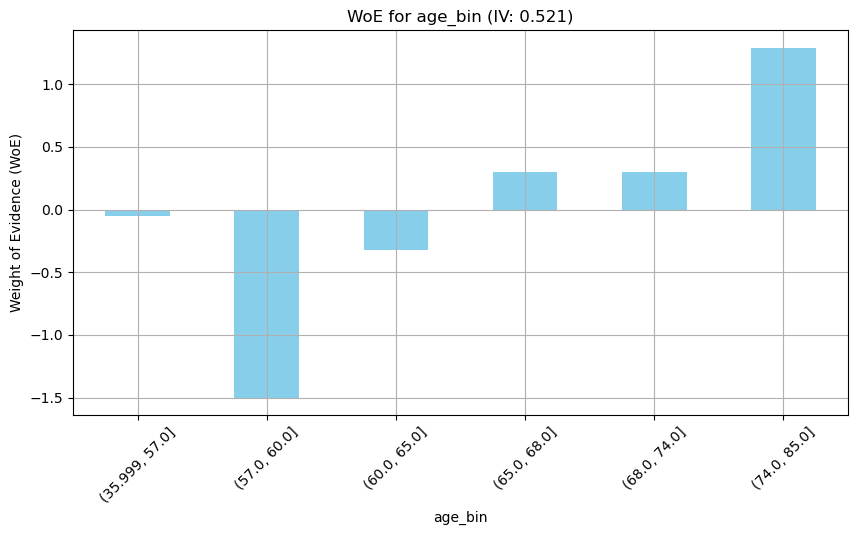

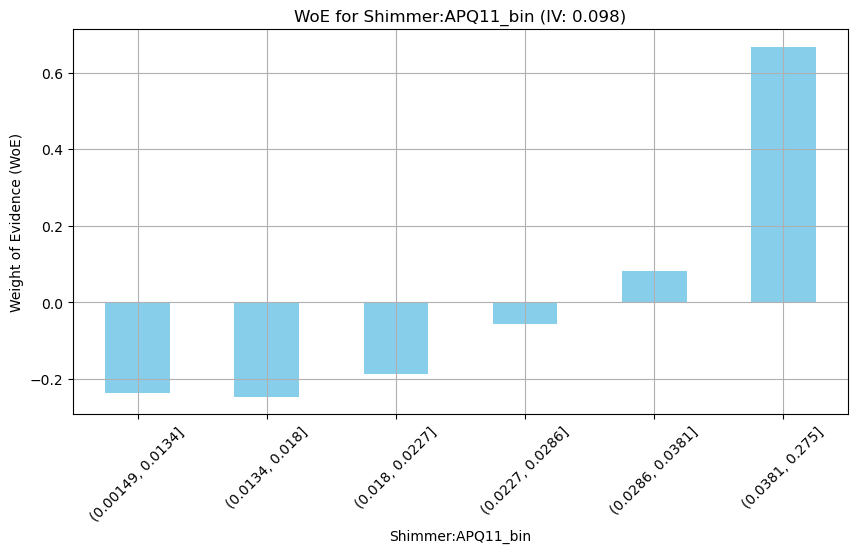

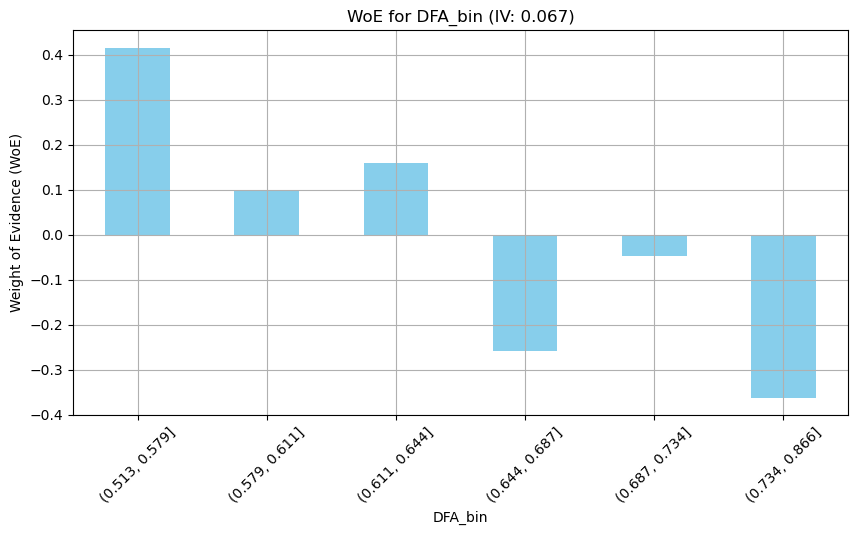

In [22]:
import matplotlib.pyplot as plt

top_iv_vars = iv_df.nlargest(3, 'Sum IV')['Variable']
print(top_iv_vars)

# Create WoE graphs for each variable with the highest IV
for var in top_iv_vars:
    _, woe_table = calculateWoeAndIv(df, var, 'motor_UPDRS_binary')
    # Graphical display of WoE values
    plt.figure(figsize=(10, 5))
    woe_table['WoE'].plot(kind='bar', color='skyblue')
    plt.title(f"WoE for {var} (IV: {iv_values[var]:.3f})")
    plt.xlabel(var)
    plt.ylabel('Weight of Evidence (WoE)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Comments:

Only the top IVs where visualized since they have the highest predictive (age with super (>0.5), Shimmer:APQ11_bin and DFA_bin with poor (0.02-0.1))

#### Group the classes according to the WoE criterion for the strongest variables

According to the visualized data we can group the WoE like so:

age : <br>
    'Group 1': '(35.999, 57.0]',<br>
    'Group 2': '(57.0, 60.0]',<br>
    'Group 3': '(60.0, 65.0]',<br>
    'Group 4': '(65.0, 68.0]',<br>
    'Group 5': '(68.0, 74.0]',<br>
    'Group 6': '(74.0, 85.0]'<br>

Shimmer:APQ11 :<br>
    'Group 1': '(0.00149, 0.0134]',<br>
    'Group 2': '(0.0134, 0.018]',<br>
    'Group 3': '(0.018, 0.0227]',<br>
    'Group 4': '(0.0227, 0.0286]',<br>
    'Group 5': '(0.0286, 0.0381]',<br>
    'Group 6': '(0.0381, 0.275]'<br>

DFA :<br>
    'Group 1': '(0.513, 0.579]',<br>
    'Group 2': '(0.579, 0.611]',<br>
    'Group 3': '(0.611, 0.644]',<br>
    'Group 4': '(0.644, 0.687]',<br>
    'Group 5': '(0.687, 0.734]',<br>
    'Group 6': '(0.734, 0.866]'<br>

Based on the IV and WoE analysis, we can draw several conclusions:

for Age (age_bin):<br>
The WoE values indicate that older age groups have higher WoE values, suggesting a higher risk or likelihood of higher Parkinson's levels. Age as proved before is a strong predictor, supported by its high IV value.

for Shimmer (Shimmer:APQ11_bin): <br>
WoE values vary across bins, showing that certain ranges are more strongly associated with Parkinson's levels. This implies that voice signal instability, measured by Shimmer, can be an indicator of Parkinson's, although it is less predictive than age.

for DFA (DFA_bin): <br>
WoE values indicate varying levels of risk, with the IV suggesting moderate predictive power. DFA (Detrended Fluctuation Analysis) reflects the complexity of voice signals, which may correlate with Parkinson's symptoms.

We can finally conclude that age is a significant factor, indicating that as patients get older, the severity of Parkinson's symptoms increases, likely due to the disease's progressive nature. Voice signal measures, such as Shimmer and DFA, have some predictive power, indicating that Parkinson's affects vocal stability and complexity.

#### Suggest how to solve the problem related to your data set based on IV, WoE analysis


We need to focus on age as a primary feature in predictive models for Parkinson's severity since it has the biggest predictivity.<br>

And include Shimmer and DFA features for additional insights, as they offer some predictive value.<br>

It would be good to gather more data on other potential predictors that might have higher IV values.<br>
